<a href="https://colab.research.google.com/github/phuongnam2002/AI-Machine-Learning/blob/main/Prototypical_Networks_for_Few_shot_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Few-shot learning (FSL)

-FSL còn có tên gọi khác là low-shot learning (LSL) là 1 phương pháp ML dùng khi mà tập dữ liệu training có rất ít thông tin. Nó sẽ đưa ra dự đoán trên 1 lượng nhỏ data. Mục tiêu của FSL không phải là giúp model nhận ra hình ảnh trong tập training mà là để "learn to learn".

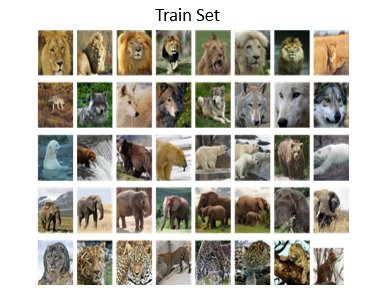

Chúng ta không cần biết đâu là con voi đâu là con hổ, FSL đưa ra sự giống và khác nhau của các bức ảnh





Tính chất của FSL:


1.   Test base cho việc học như 1 con người: con người có thể nhận biết điểm khác nhau giữa các chữ viết tay mà chỉ cần qua 1 vài ví dụ nhưng máy tính thì cần 1 lượng lớn data mẫu để nhận biết được điều đó. FSL là 1 test base giúp cho máy tính có thể học được như con người mà chỉ cần qua ít dữ liệu.
2.   Học được cái trường hợp hiếm, ít xuất hiện: sử dụng FSL máy tính có thể học được các trường hợp hiếm. Ví dụ như khi phân loại ảnh động vật, model ML đã được train qua FSL có thể phân loại được chính xác các đặc trưng riêng biệt của 1 bức ảnh mà chỉ bức ảnh đó có sau khi đã đi qua 1 lượng nhỏ dữ liệu trước đó.
3.   Giamr việc yêu cầu thêm dữ liệu và chi phí tính toán: vì FSL yêu cầu 1 lượng nhỏ data để train model nên các chi phí liên quan đến thu thập dữ liệu và gán nhãn sẽ được loại bỏ. Việc cần ít thông tin hơn của dữ liệu đồng nghĩa với việc giảm đc số chiều trong tập training 

Ứng dụng



1.   Character Recognition
2.   Image classification
3.   Object recognition
4.   Gesture recognition
5.   video classification
6.   motion prediction
7.   action localization
8.   parsing
9.   translation
10.  text classification
11.  Audio Processing
12.  Robotics
13.  Healthcare



## Support set vs Training set

Support set là 1 thuật ngữ của Meta Learning (học hiệu quả). 1 lượng nhỏ các bức ảnh được gán nhãn gọi là 1 Support Set. Lưu ý là Support Set và Training Set là khác nhau. Training Set là 1 lượng lớn. Mỗi lớp trong TS có rất nhiều samples, TS đủ lớn cho việc học 1 deep NN. ngược lại, SS thì lại nhỏ hơn, mỗi class có nhiều nhất 1 vài samples (ít nhưng vừa đủ). Trong TS, nếu mỗi class chỉ có 1 sample thì không thể train 1 deep NN và SS chỉ có thể cung cấp thêm thông tin trong lúc test. Ta không train 1 model lớn sử dụng 1 lượng dữ liệu lớn mà thay vào đó ta train model đủ để nhận ra sự giống và khác nhau giữa các objects.

## Meta Learing

SL đòi hỏi model phải nhận biết được training data và đưa ra nhãn của các test data nhưng muc tiêu của Meta Learning là "learn to learn"

Thế nào là "learn to learn": Ví dụ khi ta đến sở thú, ta gặp những con vật mà ta chưa thấy trước đó bao giờ. Khi đó nhân viên ở đó đưa cho ta 1 tập ảnh, trong đó mỗi ảnh chứa tên và hình ảnh của từng con vật. Khi ấy ta sẽ nhìn qua 1 lượt tất cả các ảnh và thấy con vật nào trong ảnh giống với con nào ở sở thú nhất. Như vậy là tự ta dạy ta học, đây gọi là "learn to learn".

Trong Meta Learning, các con vật mà máy không biết trước đó gọi là "query". Nhân viên đưa ta tập ảnh và bảo ta tự học, tập ảnh đó là Support Set. Nếu mỗi con vật chỉ có duy nhất 1 bức ảnh thì ta sẽ học để nhận ra con vật đó mà chỉ dùng 1 ảnh, đây gọi là "one short learing".




## Terminologies in few-shot learning

k-way: Support Set có k classes

n-shot: mỗi class có n samples

Support Set gọi là k-way and n-shot

## Prediction accuracy of few-shot learning

Khi dùng FSL, độ chính xác của việc dự đoán dựa vào k và n. K càng lớn thì kết quả dự đoán sẽ càng nhỏ. Ví dụ việc chọn tuyến đường đi ở ngã 3 sẽ dễ hơn là chọn ngã tư hay ngã 6. Cũng vì vậy mà N càng lớn thì kết quả càng cao.

## Basic idea behind few-shot learning

Ý tưởng cơ bản của FSL là train 1 hàm dự đoán được sự giống nhau: sim(x,x') = 1 nếu x và x' giống nhau và =0 nếu ngược lại trong đó x và x' là 2 sample. Sau khi training, hàm tính sự giống nhau có thể được sử dụng cho việc đưa ra dự đoán cho các unseen query. Ta có thể sử dụng hàm tính sự giống nhau để so sánh các query với mỗi sample trong SS và tính toán similarity score và sau đó tìm sample nào có score cao nhất rồi lấy nó làm dự đoán.

Ví dụ:

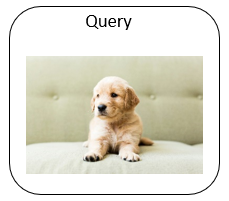

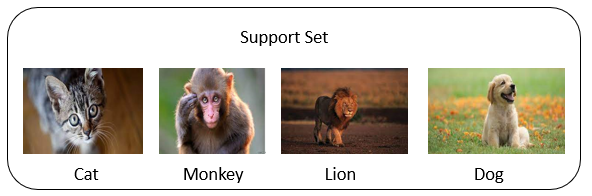

Ta có bức ảnh query như trên, ta muốn biết con vật trong ảnh là con nào. Ta có thể so sánh query với mỗi sample trong SS.

Gỉa sử sau khi so sánh query với Cat, hàm similarity đưa ra score là 0.6, score giữa query và Monkey là 0.4, Lion là 0.2 và Dog là 0.9. Như vậy 0.9 là lớn nhất nên model đưa ra dự đoán Query là Dog. One-shot learning cũng có thể được dùng trong ví dụ này. Ta có thể tính toán toàn bộ similarity giữa Query với mỗi sample trong SS để tìm ra sample giống nhất.

## Zero-shot Learning

Về cơ bản, Zero-shot hoạt động bằng cách kết hợp các mục quan sát/nhìn thấy với các mục không quan sát/nhìn thấy thông qua một số loại thông tin bổ trợ, mã hóa các thuộc tính phân biệt có thể quan sát của các đối tượng.

Zero-shot bao gồm 2 giai đoạn:

  * Training: Huấn luyện mô hình với các thuộc tính đã biết
  * Inference: Mô hình sau khi huấn luyện được sử dụng để phân loại các cá thể trong một tập hợp các lớp mới

Cách Zero-shot hoạt động:

Có 2 cách tiếp cận phổ biến được dùng trong CV:

1. Tiếp cận dựa trên embedding: 

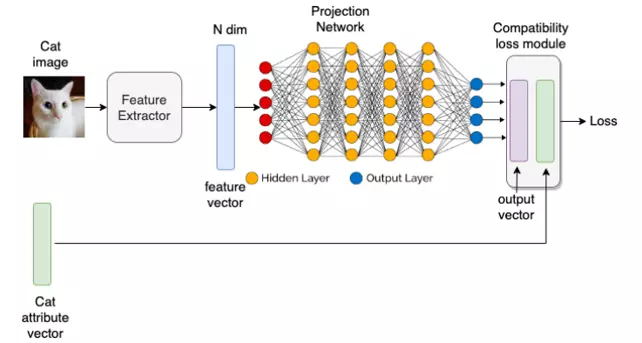

Mục tiêu chính là ánh xạ các đặc điểm, danh mục, các thuộc tính ngữ nghĩa vào 1 không gian nhúng bằng một hàm ánh xạ $y=f(x)$, trong đó hàm này sẽ được học:

*Trong quá trình Training*:
  * Các thuộc tính, categories sẽ được vector hóa để làm nhãn cũng như thuật tiện cho việc mô hình so sánh với dự đoán để điều chỉnh lại mô hình. Giả sử có các categories như: 4 chân, có đuôi, ăn cá, giả sử dùng kỹ thuật encoding đơn giản nhất đó là thuộc tính nào positive thì để là 1, negative để là 0 thì ta sẽ có attribute vector đối với con chim là [0,1,1].

   * Đối với mỗi bức ảnh đầu vào sẽ được đưa qua một mạng Deep Neural network để trích xuất ra vector đặc trưng của ảnh. Giả sử vector đặc trưng này có số chiều là N. Trong khi dữ liệu có D thuộc tính cần quan tâm. Lúc này ta sẽ sử dụng một mạng ANN bao gồm các lớp Fully connected để giảm số chiều từ N xuống D, đồng thời tính toán vector biểu thị ra xác suất của các đặc trưng (có số chiều D). Đầu ra của mô hình sẽ được so sánh với vector thuộc tính đã nêu trên bằng 1 hàm Loss để điều chỉnh mô hình sao cho bức ảnh đầu vào trả ra đặc tính sát nhất với đặc tính đúng của nó.

*Trong quá trình Inferences*:



*   Khi mô hình đã học được việc trả ra các đặc trưng, categories của ảnh đầu vào, khi đưa một bức ảnh mới chưa có trong các nhóm quan sát được vào, mô hình sẽ trả ra các đặc trưng ngữ nghĩa của bức ảnh đó dưới dạng vector (Đó là lý do tại sao gọi là tiếp cận dựa trên nhúng).
*   giả sử có các đặc trưng như sau: 4 chân, ăn cá, ăn cỏ, có vằn, có đuôi, vector thuộc tính của con ngựa sẽ là [1, 0, 1, 0, 1]. Ta đưa đầu vào là bức ảnh con ngựa vằn vào, mô hình trả ra cho ta vector thuộc tính dạng như con ngựa nhưng ở thuộc tính có vằn thì lại có trong khi con ngựa thì không. Chính việc tạo ra các vector thuộc tính này sẽ giúp chúng ta trong việc truy vấn về sau, kiểu như mô hình mình chỉ nhận dạng được con ngựa, tuy nhiên mình chỉ cần tìm các hình ảnh nào dự đoán là con ngựa và có thêm thuộc tính có vằn thì đó sẽ là con ngựa vằn.



2. Tiếp cận dựa trên mô hình sinh

Hạn chế của Nhúng là việc học chỉ dựa trên những gì mô hình nhìn thấy (giả sử có những ảnh con ngựa nó ko ăn cỏ mà đang chạy thì đặc tính ăn cỏ sẽ bị lu mờ do mô hình ko nhìn thấy). Để khắc phục điều đó thì ta tiếp cận bằng mô hình sinh

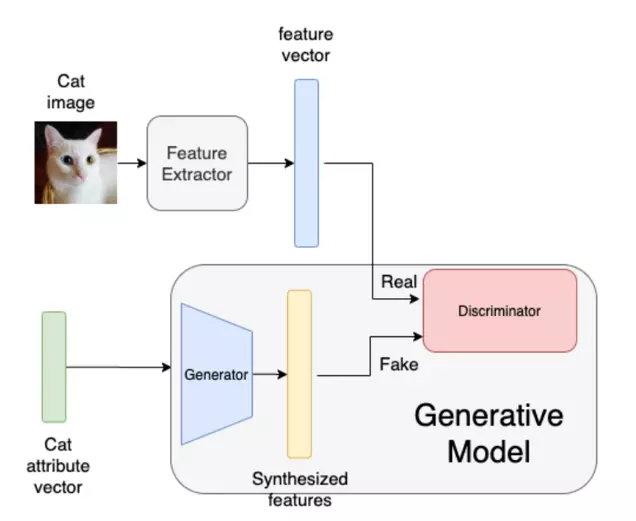


Ảnh đầu vào vẫn được trích xuất ra vector đặc trưng thông qua một mạng DNN như ở cách tiếp cận nhúng. Còn về phía vector thuộc tính, thay vì được đối chiếu trực tiếp với đặc trưng của ảnh đầu vào, chúng sẽ được đưa vào một mô hình sinh (Generative Model), dùng mạng GAN để train. 

## Prototypical Networks (Mạng nguyên mẫu)

Hoạt động hiệu quả hơn Meta Learning, giúp ta tiếp cận nhanh hơn tới FSL hay ZSL. PN dựa trên khái niệm xuất hiện 1 embedding trong đó một số điểm  tập hợp xung quanh 1 biểu diễn Prototypical duy nhất cho mỗi class nhằm mục đích tìm hiểu các nguyên mẫu cho mỗi class dựa trên trung bình mẫu trong không gian feature.

PN tính toán nguyên mẫu của mỗi lớp thông qua một hàm embedding. Ngoài ra mỗi nguyên mẫu là 1 vector trung bình của các điểm đã được embedded thuộc class đó. PN học một không gian số liệu trong đó các classification có thể được biểu diễn bằng cách tính khoảng cách giữa các nguyên mẫu trong mỗi class với nhau. 

## Prototypical networks vs matching networks

Matching networks sử dụng một cơ chế trên việc embedding các data được gán nhãn để dự đoán các class chưa được gán nhãn.

MN tạo ra 1 trọng số của các classifier gần nhất được cho bởi SS trong khi PN tạo ra 1 classifier tuyến tính sử dụng norm Euclide.
